## Predicting Tesla stock prices using LInear Regression model in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

# for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

Next we load the dataset

In [2]:
tesla = pd.read_csv('C:/Users/NP/OneDrive/Documents/Research/TSLA.csv')
tesla.head()  # To return the first 5 rows of the dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [3]:
tesla.info()  # To check the datatypes and the null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3124 non-null   object 
 1   Open       3124 non-null   float64
 2   High       3124 non-null   float64
 3   Low        3124 non-null   float64
 4   Close      3124 non-null   float64
 5   Adj Close  3124 non-null   float64
 6   Volume     3124 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 171.0+ KB


In [4]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [5]:
print(f'The dataframe contains stock prices between {tesla.Date.min()} and {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max()-tesla.Date.min()).days} days')

The dataframe contains stock prices between 2010-06-29 00:00:00 and 2022-11-22 00:00:00
Total days = 4529 days


In [6]:
tesla.describe()    # This gives some summary statistics

,Open,High,Low,Close,Adj Close,Volume
count,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3.124000e+03
mean,58.012474,59.308837,56.585925,57.972702,57.972702,9.329024e+07
std,95.572788,97.766715,93.098977,95.450557,95.450557,8.185456e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,8.512833,8.695167,8.291000,8.478667,8.478667,4.201275e+07
50%,16.146334,16.400000,15.851000,16.147999,16.147999,7.554450e+07
75%,24.087167,24.455332,23.584499,23.979000,23.979000,1.170838e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


Lets create a box plot to identify the outliers

<AxesSubplot:>

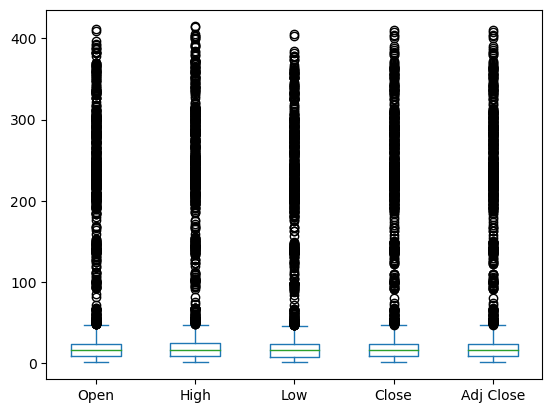

In [7]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [8]:
# Setting the layout for out plot
layout = go.Layout( title = 'Stock prices of Tesla', 
                   xaxis = dict(title = "Date", titlefont = dict(family = 'Courier New, monospace', size = 18,
                                                                                                   color = '#7f7f7f')),
                  yaxis = dict(title = 'Price', titlefont = dict(family = 'Courier New, monospace', size = 18, color = '#7f7f7f')))
tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [9]:
# Plotting the graph
iplot(plot)

In [11]:
# Building the regression model
from sklearn.model_selection import train_test_split

# For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [15]:
# Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [16]:
# Feature Scaling
scaler = StandardScaler().fit(X_train)

The machine learning algorithm will behave badly if the individual features are not normally distributed

In [21]:
# importing the linear regression model from the scikit learn library
from sklearn.linear_model import LinearRegression

In [22]:
# Creating a linear model
lm = LinearRegression()    # Declaring a linear regression function
lm.fit(X_train, Y_train)   # Passing the training datasets

LinearRegression()

In [24]:
# Plot actual and predicted values for training dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)

trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = "Predicted"
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data = tesla_data, layout = layout)

In [26]:
iplot(plot2)

In [30]:
# Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.5219519424121488	0.5206969667839008
MSE       4360.717856085414	4347.544230572545



## Predicting Tesla stock prices using Long Short Term Memory networks

LSTMs are a type of recurrent neural network for learning long-term dependencies. It is commonly used for processing and predicting on the base of time_series data